# 3rd Project of Computer Vision & Photogrammetry

In [24]:
%pip install numpy matplotlib opencv-python scipy

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   -- ------------------------------------- 2.6/38.6 MB 16.7 MB/s eta 0:00:03
   -------- ------------------------------- 7.9/38.6 MB 22.1 MB/s eta 0:00:02
   ------------- -------------------------- 13.4/38.6 MB 23.3 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/38.6 MB 24.3 MB/s eta 0:00:01
   ------------------------- -------------- 24.1/38.6 MB 24.6 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/38.6 MB 24.8 MB/s eta 0:00:01
   ----------------------------------- ---- 34.6/38.6 MB 25.0 MB/s eta 0:00:01
   ---------------------------------------- 38.6/38.6 MB 24.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2 as cv
import numpy as np

In [42]:
# https://www.tutorialspoint.com/opencv-python-how-to-display-the-coordinates-of-points-clicked-on-an-image

# define a function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
   if event == cv.EVENT_LBUTTONDOWN:
      print(f'[{x},{y}]')
      img_cords.append((x,y)) # save coordinates to a list
      # put coordinates as text on the image
      cv.putText(img, f'({x},{y})',(x,y),
      cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
      
      # draw point on the image
      cv.circle(img, (x,y), 3, (0,255,255), -1)

## Example

In [3]:
img = cv.imread("IMG_20250516_112645.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

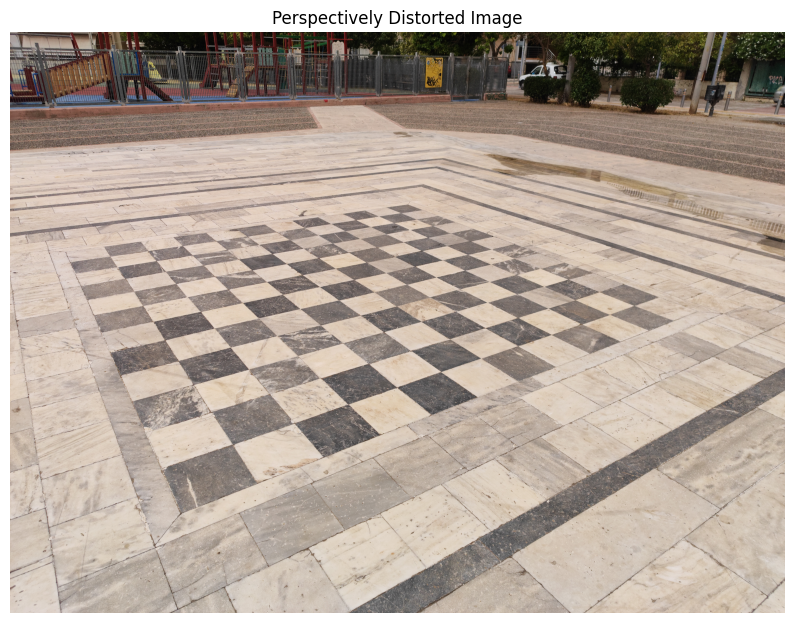

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('Perspectively Distorted Image')
plt.axis('off')
plt.show()

## The center of the chessboard was assigned as the arbitrary origin for this project. I defined 11 characteristic points with (X,Y) coordinates in cm:
```
[[-153, -153],
[-153, 153],
[153, 153],
[153, -153],
[-102, -76.5],
[76.5, -127,5],
[76.5, 25.5],
[95.5, 91.8],
[-30, 149.5],
[-129, 101.7],
[-102.5, -131.5]]
```

In [5]:
obj_coords = np.array([
    [-153, -153],
    [-153, 153],
    [153, 153],
    [153, -153],
    [-102, -76.5],
    [76.5, -127.5],
    [76.5, 25.5],
    [95.5, 91.8],
    [-30, 149.5],
    [-129, 101.7],
    [-102.5, -131.5]
], dtype=np.float32)

print(obj_coords)

[[-153.  -153. ]
 [-153.   153. ]
 [ 153.   153. ]
 [ 153.  -153. ]
 [-102.   -76.5]
 [  76.5 -127.5]
 [  76.5   25.5]
 [  95.5   91.8]
 [ -30.   149.5]
 [-129.   101.7]
 [-102.5 -131.5]]


In [6]:
print(img.shape)

(9000, 12000, 3)


In [7]:
# lets resize it a bit :)
# https://gist.github.com/georgeblck/e3e0274d725c858ba98b1c36c14e2835
# INTER.AREA is a very efficient interpolation method when downsampling
img = cv.resize(img, (0, 0), fx=0.15, fy=0.15, interpolation=cv.INTER_AREA)
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
print(img.shape)

(1350, 1800, 3)


In [ ]:
"""
Scip this part if pixel coordinates are ready to be used in the next code cell

"""

img_cords = []
# create a window
cv.namedWindow('Point Coordinates')

# bind the callback function to window
cv.setMouseCallback('Point Coordinates', click_event)

# display the image
while True:
   cv.imshow('Point Coordinates',img)
   k = cv.waitKey(1) & 0xFF
   if k == 27: # 27 is the ESC key
      break
cv.destroyAllWindows()

pix_coords = np.array(img_cords, dtype=np.float32)

In [8]:
# run this snippet to skip the manual selection of points, I am the only one who knows where to click :P

pix_coords = np.array([
    [396,1117],
    [129,512],
    [923,402],
    [1597,650],
    [555,784],
    [1325,679],
    [956,509],
    [893,453],
    [523,461],
    [244,551],
    [666,925]
])

The pixel coordinates of the chessboard's characteristic points in the resized image `IMG_20250516_112645.jpg` are:
```
[396,1117]
[129,512]
[923,402]
[1597,650]
[555,784]
[1325,679]
[956,509]
[893,453]
[523,461]
[244,551]
[666,925]
```

# With **OpenCV** function `findHomography()` we can find the Homography matrix to reconstruct the chessboard

In [10]:
# https://www.geeksforgeeks.org/python-opencv-findhomography-inputs/
H, _ = cv.findHomography(pix_coords, obj_coords)
print(H)

[[-4.01150798e+00  6.46857508e+00 -5.20893589e+02]
 [ 2.37038890e+00  1.11348604e+01 -8.29493726e+03]
 [ 9.23819681e-04 -3.11271151e-02  1.00000000e+00]]


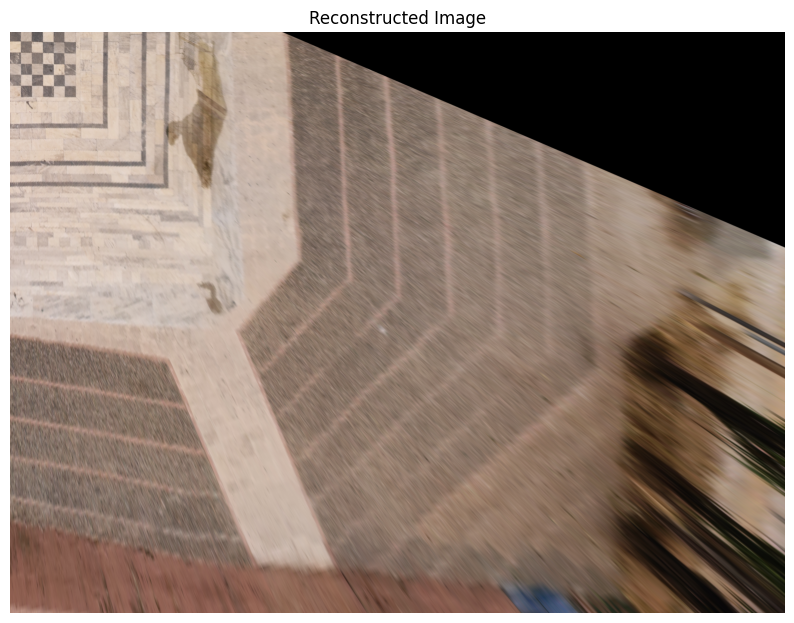

In [11]:
img = cv.imread("IMG_20250516_112645.jpg")
img = cv.resize(img, (0, 0), fx=0.15, fy=0.15, interpolation=cv.INTER_AREA)
reconstructed_img = cv.warpPerspective(img, H, (img.shape[1], img.shape[0]))
reconstructed_img = cv.cvtColor(reconstructed_img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

# 1. Finding the optimal perspective transformation matrix **H(i,j)** of 9 parameters h(i,j) using SVD method `A*h = 0`.
![Screenshot from 2025-05-16 15-22-45.png](<attachment:Screenshot from 2025-05-16 15-22-45.png>)
![Screenshot from 2025-05-16 17-16-18.png](<attachment:Screenshot from 2025-05-16 17-16-18.png>)
![Screenshot from 2025-05-16 17-16-43.png](<attachment:Screenshot from 2025-05-16 17-16-43.png>)
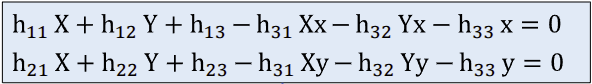
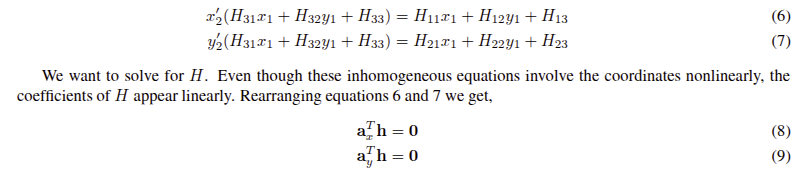
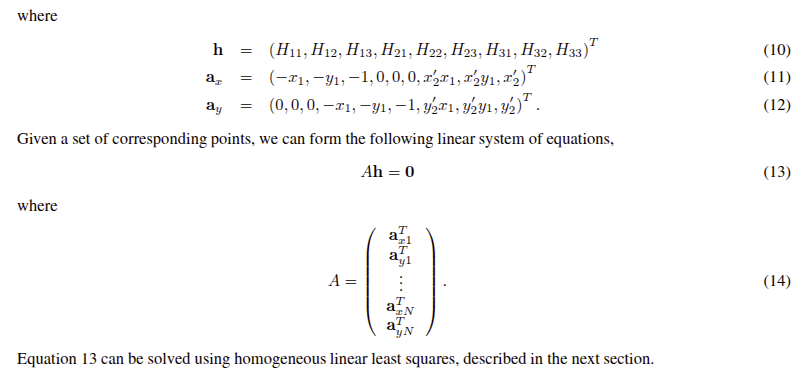

In [12]:
# we need to find 9 parameters for the projective transformation matrix H. 
# So A will be a 2n x 9 matrix where n is the number of points from the image.
# https://cseweb.ucsd.edu/classes/wi07/cse252a/homography_estimation/homography_estimation.pdf

A = []

for i in range(obj_coords.shape[0]):
    x, y = pix_coords[i]
    X, Y = obj_coords[i]

    # coefficients of the collinearity condition equations
    A.append([-x, -y, -1, 0, 0, 0, x*X, y*X, X])
    A.append([0, 0, 0, -x, -y, -1, x*Y, y*Y, Y])

A = np.asarray(A)
print(A.shape)

(22, 9)


In [13]:
from scipy.linalg import svd, inv # type: ignore

In [14]:
U, S, Vh = svd(A)
print(Vh.shape)
print(S.shape)
print(U.shape)

print('\n', S[-1]) # Last singular value which represents if there is a homography that fits the points exactly or is a good fit.

(9, 9)
(9,)
(22, 22)

 0.007302281303223403


## Approximation of the Projective Transformation Matrix H

In [15]:
# approximating projection transformation matrix
H_appr = Vh[-1, :] # Is the right singular vector corresponding to the smallest singular value
# It contains the coefficients of the homography matrix which best fits the points
H_appr = H_appr.reshape(3, 3)
H_appr /= H_appr[2, 2] # normalize
print(H_appr)

[[-4.23580803e+00  6.81958908e+00 -5.45651869e+02]
 [ 2.50414811e+00  1.17769821e+01 -8.77321477e+03]
 [ 9.51551643e-04 -3.27648741e-02  1.00000000e+00]]


## Finding the coefficients of the inverse projective transformation matrix H

In [16]:
H_inv = inv(H_appr)
H_inv = H_inv / H_inv[2, 2] # normalize
print(H_inv)

[[ 4.11688831e+00 -1.65147050e-01  7.97517261e+02]
 [ 1.62066052e-01  5.55027574e-02  5.75369255e+02]
 [ 1.39264197e-03  1.97568681e-03  1.00000000e+00]]


# 2. Re-projection of known pixel coordinates into points in space

In [17]:
# converting coordinates into homogenous
hom_pix_coords = np.hstack((pix_coords, np.ones((pix_coords.shape[0], 1))))
print(hom_pix_coords)

[[3.960e+02 1.117e+03 1.000e+00]
 [1.290e+02 5.120e+02 1.000e+00]
 [9.230e+02 4.020e+02 1.000e+00]
 [1.597e+03 6.500e+02 1.000e+00]
 [5.550e+02 7.840e+02 1.000e+00]
 [1.325e+03 6.790e+02 1.000e+00]
 [9.560e+02 5.090e+02 1.000e+00]
 [8.930e+02 4.530e+02 1.000e+00]
 [5.230e+02 4.610e+02 1.000e+00]
 [2.440e+02 5.510e+02 1.000e+00]
 [6.660e+02 9.250e+02 1.000e+00]]


In [18]:
approx_obj_coords = hom_pix_coords @ H_appr.T
approx_obj_coords /= approx_obj_coords[:, 2][:, np.newaxis] # normalize
print(approx_obj_coords)

[[-153.15763086 -152.55765038    1.        ]
 [-153.29835402  154.62758789    1.        ]
 [ 151.75754355  152.97167112    1.        ]
 [ 153.24181757 -153.42521455    1.        ]
 [-101.41051852  -76.56357       1.        ]
 [  76.4312507  -127.15316771    1.        ]
 [  76.10652013   26.05462641    1.        ]
 [  95.35736178   92.51601009    1.        ]
 [ -28.13644664  149.50868711    1.        ]
 [-129.50300029   99.46251254    1.        ]
 [-102.58223267 -132.11571564    1.        ]]


In [19]:
# reprojection error
Errors = obj_coords - approx_obj_coords[:, :2]
print(f"Errors of reprojection: \n{Errors}")

sigma_0 = np.sqrt(np.sum(Errors[:, 0]**2 + Errors[:, 1]**2) / 13) # 13: 22 is the number of collinearity function equations for 11 points, minus 9 parameters.
print(f"\nMean Squared Error of reprojection: {sigma_0}")

Errors of reprojection: 
[[ 0.15763086 -0.44234962]
 [ 0.29835402 -1.62758789]
 [ 1.24245645  0.02832888]
 [-0.24181757  0.42521455]
 [-0.58948148  0.06357   ]
 [ 0.0687493  -0.34683229]
 [ 0.39347987 -0.55462641]
 [ 0.14263822 -0.71600704]
 [-1.86355336 -0.00868711]
 [ 0.50300029  2.23748441]
 [ 0.08223267  0.61571564]]

Mean Squared Error of reprojection: 1.0860117383159504


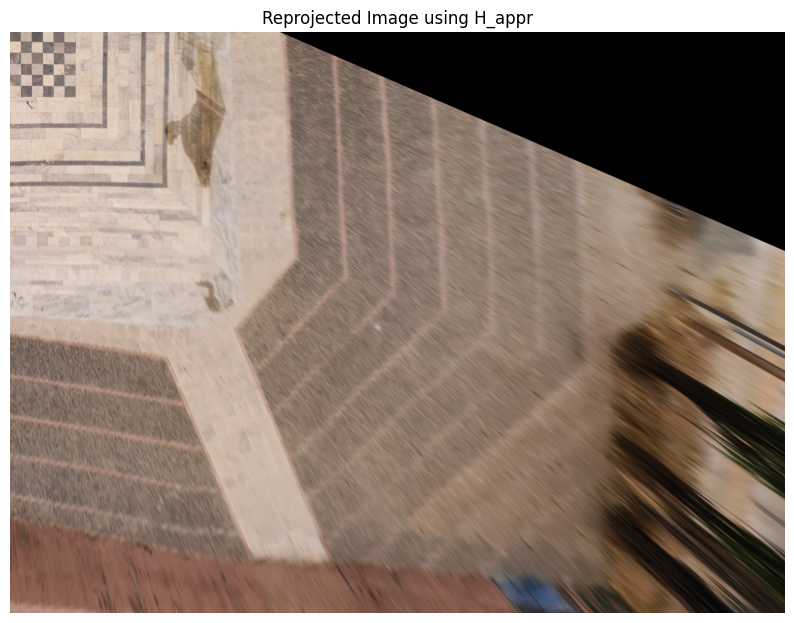

In [20]:
# Image reprojection using H_appr and warpPerspective
reprojected_img = cv.warpPerspective(img, H_appr, (img.shape[1], img.shape[0]))
reprojected_img = cv.cvtColor(reprojected_img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(reprojected_img)
plt.title('Reprojected Image using H_appr')
plt.axis('off')
plt.show()